# Supervised Learning Capstone 

Dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from wordcloud import WordCloud
from scipy.stats.mstats import winsorize

# Display preferences
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 2000)

In [2]:
# Create dataframe
cars = pd.read_csv('../../data/vehicles.csv')

## Data Cleaning 

To begin, we'll start by taking a look at the dimensions of this dataset.

In [3]:
print('Number of rows: {}'.format(cars.shape[0]))
print('Number of columns: {}'.format(cars.shape[1]))

Number of rows: 509577
Number of columns: 25


Let's now review the column types and missing values.

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
description     509561 non-null object
county          0 non-null float64
state           509577 non-null obj

There are a total of 25 columns in this dataset: 5 are of type float, 2 are of type integer and 18 are of type string.

In [5]:
cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [6]:
cars.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
509572,7034554007,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,15476,2012.0,nissan,xterra,NaN,6 cylinders,gas,103135.0,clean,automatic,5N1AN0NW0CC520698,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,NaN,ut,39.6405,-104.961
509573,7034538385,https://saltlakecity.craigslist.org/ctd/d/engl...,salt lake city,https://saltlakecity.craigslist.org,9881,2008.0,bmw,3 series 328i,NaN,6 cylinders,gas,108277.0,clean,automatic,WBAWR33558P150498,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,Maximum Auto SearchÂ Â Â Â Â Â Â Â STOCK #:Â Â...,NaN,ut,39.6405,-104.961
509574,7034523643,https://saltlakecity.craigslist.org/ctd/d/salm...,salt lake city,https://saltlakecity.craigslist.org,24895,2019.0,jeep,cherokee,NaN,4 cylinders,gas,6973.0,clean,automatic,1C4PJMLB0KD267506,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,"2019 Jeep Cherokee Latitude Plus -- $24,895 ...",NaN,ut,45.1637,-113.894
509575,7034458858,https://saltlakecity.craigslist.org/cto/d/ogde...,salt lake city,https://saltlakecity.craigslist.org,32500,2017.0,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,37520.0,clean,automatic,NaN,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,2017 Porsche Macan GTS Carmine Red w/ Black ...,NaN,ut,41.3112,-111.969
509576,7034389294,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,12900,2012.0,ram,NaN,NaN,NaN,gas,152296.0,clean,automatic,3C6TD5HT1CG309173,4wd,NaN,pickup,black,https://images.craigslist.org/00E0E_3FtnUA2XPT...,"2012 RAM 2500 4WD Crew Cab 169"" ST"" Offere...",NaN,ut,40.3744,-104.694


In [7]:
cars.describe()

,id,price,year,odometer,county,lat,long
count,5.095770e+05,5.095770e+05,508050.000000,4.172530e+05,0.0,499285.000000,499285.000000
mean,7.044176e+09,5.479684e+04,2009.662236,1.017300e+05,NaN,38.453818,-94.313886
std,4.937219e+06,9.575025e+06,8.567953,1.073790e+05,NaN,5.902152,17.717653
min,6.995212e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-82.688100,-165.935000
25%,7.040802e+09,3.995000e+03,2007.000000,4.948800e+04,NaN,34.557400,-108.506000
50%,7.045325e+09,9.377000e+03,2011.000000,9.489400e+04,NaN,39.145300,-88.678800
75%,7.048556e+09,1.795500e+04,2015.000000,1.387780e+05,NaN,42.449000,-81.111400
max,7.050103e+09,3.600029e+09,2021.000000,1.000000e+07,NaN,81.569300,94.124800


In [8]:
cars.describe(include=['O'])

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,state
count,509577,509577,509577,486813,501588,277643,309894,505592,506515,505858,302152,365434,167574,368046,344871,509563,509561,509577
unique,509577,403,413,43,35852,6,8,5,6,3,180145,3,4,13,12,349468,427803,51
top,https://southbend.craigslist.org/ctd/d/elkhart...,fayetteville,https://modesto.craigslist.org,ford,f-150,excellent,6 cylinders,gas,clean,automatic,WDC0G4JB4HF164180,4wd,full-size,sedan,white,https://images.craigslist.org/00i0i_ChcqziILO2...,CLEAN TITLE NO ACCEDINTS 3 YEARS WARRANTY D...,ca
freq,1,4501,2992,92601,11341,140663,111940,441688,487040,457659,114,170482,90481,93225,89322,167,160,52780


## Missing Values and Outliers

I summed up the missing values so we can see the total number for each variable.

In [9]:
# Missing values for each variable
cars.isnull().sum().sort_values()

id                   0
url                  0
region               0
region_url           0
price                0
state                0
image_url           14
description         16
year              1527
title_status      3062
transmission      3719
fuel              3985
model             7989
lat              10292
long             10292
manufacturer     22764
odometer         92324
type            141531
drive           144143
paint_color     164706
cylinders       199683
vin             207425
condition       231934
size            342003
county          509577
dtype: int64

I would also like to show what the percentage of missing values for each variable.

In [10]:
# Percentage of missing values for each variable
round((cars.isnull().sum() / len(cars)) * 100, 4).sort_values()

id                0.0000
url               0.0000
region            0.0000
region_url        0.0000
price             0.0000
state             0.0000
image_url         0.0027
description       0.0031
year              0.2997
title_status      0.6009
transmission      0.7298
fuel              0.7820
model             1.5678
lat               2.0197
long              2.0197
manufacturer      4.4672
odometer         18.1178
type             27.7742
drive            28.2868
paint_color      32.3221
cylinders        39.1860
vin              40.7053
condition        45.5150
size             67.1151
county          100.0000
dtype: float64

In [11]:
# Drop id, url, region_url, image_url, county and vin
cars = cars.drop(['id', 'url', 'region_url', 'image_url', 'county', 'vin'], axis=1)

# Drop rows
cars = cars.dropna(subset=['description'])

I decided to drop ```url```, ```region_url``` and ```image_url``` from the dataset because the URLs don't add any value. In addition, ```id```, ```county``` and ```vin``` were removed. ```county``` only contains missing values and ```id``` and ```vin``` are unique identifiers that don't add any value to the target variable.

I also removed records with missing values from ```description```.

In [12]:
# Print unique values, number of unique values and value frequency details
def variable_details(column):
    print('There are {} missing values in {}\n'.format(cars[column].isnull().sum(), column))
    print('The are {} unique values in {}\n'.format(cars[column].nunique(), column))
    print('The unique values are \n{}\n'.format(cars[column].unique()))
    print('The value frequency is \n{}'.format(cars[column].value_counts()))

I created the ```variable_details``` function to print out number of missing values, unique values, number of unique values and value frequency for each column.

### Missing values for ```year```

In [13]:
# Print out variable details
variable_details('year')

There are 1513 missing values in year

The are 114 unique values in year

The unique values are 
[2012. 2016. 2015. 2018. 2009. 2017. 2007. 2013. 1994. 2004. 2014. 2002.
 2003. 2019. 2010. 2008. 2001.   nan 1992. 2011. 1999. 1935. 2006. 2005.
 1981. 1950. 1955. 1977. 2000. 1951. 1998. 1986. 1995. 1997. 1993. 1991.
 1969. 2020. 1964. 1970. 1980. 1972. 1978. 1990. 1931. 1983. 1996. 1974.
 1971. 1966. 1988. 1952. 1943. 1940. 1956. 1982. 1987. 1959. 1958. 1973.
 1948. 1976. 1984. 1960. 1954. 1962. 1942. 1989. 1968. 1979. 1985. 1965.
 1967. 1963. 1939. 1953. 1929. 1949. 1917. 1947. 1932. 1975. 1946. 1957.
 1961. 1937. 1941. 1938. 1936. 1928. 1934. 1933. 1900. 2021. 1926. 1923.
 1919. 1930. 1920. 1927. 1901. 1902. 1925. 1918. 1912. 1922. 1924. 1945.
 1914. 1916. 1911. 1915. 1921. 1944. 1903.]

The value frequency is 
2016.0    41171
2015.0    37311
2014.0    35626
2013.0    35106
2012.0    33493
2017.0    33450
2011.0    31424
2008.0    28543
2007.0    26193
2010.0    24307
2018.0    22486
2

In [14]:
# Print out variable descriptive statistics
cars['year'].describe()

count    508048.000000
mean       2009.662248
std           8.567967
min        1900.000000
25%        2007.000000
50%        2011.000000
75%        2015.000000
max        2021.000000
Name: year, dtype: float64

In [15]:
# Investigate minimum value
cars[cars['year'] == 1900]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long
36150,eau claire,1,1900.0,NaN,ASK TOM DAUPHIN,NaN,NaN,diesel,NaN,clean,other,NaN,NaN,NaN,NaN,We have Large inventory of certified TDI diese...,wi,NaN,NaN
37497,green bay,1,1900.0,NaN,ASK FOR TOM DAUPHIN,excellent,NaN,diesel,NaN,clean,other,NaN,NaN,NaN,NaN,We have Large inventory of certified TDI diese...,wi,43.0668,-88.1469
44828,milwaukee,1,1900.0,NaN,ASK TOM DAUPHIN,excellent,NaN,diesel,NaN,clean,other,NaN,NaN,NaN,NaN,We have Large inventory of certified TDI diese...,wi,43.0668,-88.1469
81183,chico,0,1900.0,NaN,Used Cars,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,Call (or text) â 530-895-5555 Chuck Have ba...,ca,39.7489,-121.8990
82299,chico,0,1900.0,NaN,Used Cars,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,Call (or text) â 530-895-5555 Chuck Have ba...,ca,39.7489,-121.8990
82429,chico,0,1900.0,NaN,Used Cars,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,Call (or text) â 530-895-5555 Chuck Have ba...,ca,39.7489,-121.8990
94519,yuba-sutter,0,1900.0,NaN,Used Cars,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,Call (or text) â 530-895-5555 Chuck Have ba...,ca,39.7485,-121.8950
104655,redding,0,1900.0,NaN,Used Cars,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,Call (or text) â 530-895-5555 Chuck Have ba...,ca,39.7514,-121.9000
105673,redding,0,1900.0,NaN,Used Cars,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,Call (or text) â 530-895-5555 Chuck Have ba...,ca,39.7514,-121.9000
106319,redding,0,1900.0,NaN,Used Cars,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,Call (or text) â 530-895-5555 Chuck Have ba...,ca,39.7514,-121.9000


In [16]:
# Investigate maximum value
cars[cars['year'] == 2021]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long
39197,janesville,1,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39213,janesville,1,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39219,janesville,1,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39232,janesville,150,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39234,janesville,1,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39235,janesville,300,2021.0,NaN,Beloit,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,1 year old Purebred German shepherd High ener...,wi,42.5620,-89.0860
39241,janesville,800,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
39243,janesville,800,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
41905,madison,1,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025
41920,madison,150,2021.0,NaN,Janesville,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,Bowar and son auto is ready to get you into th...,wi,42.6683,-89.0025


In [17]:
# Create dataframes
cars_1900 = cars[cars['year'] == 1900]
cars_2021 = cars[cars['year'] == 2021]

# Remove 1900 and 2021 rows
cars.drop(cars_1900.index, inplace=True)
cars.drop(cars_2021.index, inplace=True)

In [18]:
# Create missing values boolean series
cars_year_nulls = cars['year'].isnull()

In [19]:
# If first character of description is '2', then the addition of three trailing characters represent year
def populate_year(description):
    desc_slice = str(description)[0]

    if desc_slice == '2':
        year = str(description)[:4]
        return float(year)

In [20]:
# Replace missing values with year from description column
cars.loc[cars_year_nulls, 'year'] = cars.loc[cars_year_nulls, 'description'].apply(populate_year)

In [21]:
# Now see there are 26 missing values
cars['year'].isnull().sum()

26

In [22]:
# Fill remaining 26 missing values with mean
cars['year'] = cars['year'].fillna(cars['year'].mean())

### Missing values for ```title_status```

In [23]:
# Print out variable details
variable_details('title_status')

There are 3048 missing values in title_status

The are 6 unique values in title_status

The unique values are 
['clean' 'rebuilt' 'salvage' 'lien' nan 'missing' 'parts only']

The value frequency is 
clean         486993
rebuilt        10473
salvage         5324
lien            2848
missing          606
parts only       223
Name: title_status, dtype: int64


In [24]:
# Populate missing values using 'missing' categorical value
cars['title_status'] = cars['title_status'].fillna('missing')

### Missing values for ```transmission```

In [25]:
# Print out variable details
variable_details('transmission')

There are 3705 missing values in transmission

The are 3 unique values in transmission

The unique values are 
['manual' 'automatic' 'other' nan]

The value frequency is 
automatic    457636
manual        33962
other         14212
Name: transmission, dtype: int64


In [26]:
# Populate missing values using 'other' categorical value
cars.transmission = cars.transmission.fillna('other')

### Missing values for ```fuel```

In [27]:
# Print out variable details
variable_details('fuel')

There are 3971 missing values in fuel

The are 5 unique values in fuel

The unique values are 
['gas' 'diesel' 'other' nan 'electric' 'hybrid']

The value frequency is 
gas         441652
diesel       41981
other        17093
hybrid        4052
electric       766
Name: fuel, dtype: int64


In [28]:
# Populate missing values using 'other' categorical value
cars['fuel'].fillna('other', inplace=True)

### Missing values for ```lat``` and ```long```

In [29]:
# Print out variable details
variable_details('region')

There are 0 missing values in region

The are 403 unique values in region

The unique values are 
['salt lake city' 'st george' 'lynchburg' 'vermont' 'new river valley'
 'norfolk / hampton roads' 'richmond' 'charlottesville' 'roanoke'
 'danville' 'fredericksburg' 'bellingham' 'harrisonburg'
 'kennewick-pasco-richland' 'moses lake' 'southwest VA' 'winchester'
 'lewiston / clarkston' 'olympic peninsula' 'seattle-tacoma'
 'skagit / island / SJI' 'yakima' 'wenatchee' "spokane / coeur d'alene"
 'madison' 'milwaukee' 'charleston' 'eastern panhandle' 'green bay'
 'kenosha-racine' 'morgantown' 'southern WV' 'west virginia (old)'
 'appleton-oshkosh-FDL' 'eau claire' 'duluth / superior' 'la crosse'
 'janesville' 'wausau' 'wyoming' 'northern WI' 'sheboygan'
 'gadsden-anniston' 'birmingham' 'huntsville / decatur' 'dothan' 'phoenix'
 'little rock' 'anchorage / mat-su' 'mobile' 'montgomery' 'tuscaloosa'
 'auburn' 'flagstaff / sedona' 'mohave county' 'florence / muscle shoals'
 'tucson' 'fairbanks' '

In [30]:
# Print out variable details
variable_details('lat')

There are 10277 missing values in lat

The are 51483 unique values in lat

The unique values are 
[40.7372 40.5881 40.3744 ... 40.758  38.8787 41.3112]

The value frequency is 
43.1824    2339
47.6561    2146
40.4688    2077
46.2348    2057
33.7865    1814
           ... 
40.0650       1
40.1342       1
39.1549       1
33.5253       1
27.3230       1
Name: lat, Length: 51483, dtype: int64


In [31]:
# Print out variable details
variable_details('long')

There are 10277 missing values in long

The are 51462 unique values in long

The unique values are 
[-111.858 -111.884 -104.694 ... -115.226 -111.625 -111.97 ]

The value frequency is 
-84.1122     2339
-117.2370    2146
-74.2817     2077
-119.1280    2057
-84.4454     1813
             ... 
-149.8740       1
-85.3480        1
-87.2190        1
-121.5470       1
-78.9648        1
Name: long, Length: 51462, dtype: int64


In [32]:
# Retrieve region mean for latitude and longitude
region_mean = cars.groupby(['region'])[['lat', 'long']].mean()
region_mean

,lat,long
region,,
SF bay area,37.671302,-121.562285
abilene,32.657045,-95.447892
akron / canton,40.984845,-81.539258
albany,42.294080,-74.202993
albuquerque,35.296387,-106.334763
altoona-johnstown,40.400644,-78.674503
amarillo,34.944558,-101.340845
ames,41.805734,-93.124032
anchorage / mat-su,61.059055,-149.427051


In [33]:
# Create region mean lookup dictionary
region_mean_lookup = region_mean.to_dict('index')
region_mean_lookup

{'SF bay area': {'lat': 37.671301646655316, 'long': -121.56228548884987},
 'abilene': {'lat': 32.65704451403889, 'long': -95.44789200863936},
 'akron / canton': {'lat': 40.98484520641404, 'long': -81.53925789832859},
 'albany': {'lat': 42.29407989317023, 'long': -74.20299275085844},
 'albuquerque': {'lat': 35.296386586206665, 'long': -106.33476334482806},
 'altoona-johnstown': {'lat': 40.40064394463673, 'long': -78.67450311418698},
 'amarillo': {'lat': 34.94455783879523, 'long': -101.34084464127558},
 'ames': {'lat': 41.8057340248963, 'long': -93.12403195020745},
 'anchorage / mat-su': {'lat': 61.05905485502326, 'long': -149.42705097774652},
 'ann arbor': {'lat': 42.518077801724104, 'long': -83.8487925646553},
 'annapolis': {'lat': 38.8226169491525, 'long': -76.43835734463279},
 'appleton-oshkosh-FDL': {'lat': 44.135732051875635,
  'long': -88.61503594256575},
 'asheville': {'lat': 35.33552466369941, 'long': -82.61862472799206},
 'ashtabula': {'lat': 41.70146029411766, 'long': -81.2321

In [34]:
# Create list of row indexes for rows with a missing value for latitude
lat_nulls = cars[cars['lat'].isnull()].index.tolist()

In [35]:
# Create list of row indexes for rows with a missing value for longitude
long_nulls = cars[cars['long'].isnull()].index.tolist()

In [36]:
# Comparing latitude-longitude row indexes to verify lat-long pair is null
def lat_long_combination(lat, long):
    
    print('Latitude length is {}'.format(len(lat)))
    print('Longitude length is {}'.format(len(long)))
    
    is_not_valid = 0
    
    for i in range(len(lat)):
        
        if lat[i] != long[i]:
            is_not_valid += 1
            
    print('There were {} invalid combinations found'.format(str(is_not_valid)))

In [37]:
lat_long_combination(lat_nulls, long_nulls)

Latitude length is 10277
Longitude length is 10277
There were 0 invalid combinations found


In [38]:
# Update latitude missing value with region mean
def retrieve_lat(region):
    latitude = region_mean_lookup[region]['lat']
    return latitude

In [39]:
# Update longitude missing value with region mean
def retrieve_long(region):
    longitude = region_mean_lookup[region]['long']
    return longitude

In [40]:
# Retrieving row indexes lat-long null pairs
cars_lat_long = cars[cars[['lat', 'long']].isnull().any(axis=1)]

In [41]:
# Loop through row indexes and update latitude and longitude values
for i in cars_lat_long.index:
    cars['lat'][i] = retrieve_lat(cars['region'][i])
    cars['long'][i] = retrieve_long(cars['region'][i])

### Missing values for ```manufacturer```

In [42]:
# Print out variable details
variable_details('manufacturer')

There are 22711 missing values in manufacturer

The are 43 unique values in manufacturer

The unique values are 
['volkswagen' 'ford' 'gmc' 'ram' 'toyota' 'chevrolet' 'mercedes-benz'
 'jeep' nan 'honda' 'lexus' 'cadillac' 'dodge' 'hyundai' 'subaru' 'bmw'
 'chrysler' 'nissan' 'mitsubishi' 'buick' 'acura' 'kia' 'rover'
 'alfa-romeo' 'mazda' 'saturn' 'pontiac' 'volvo' 'jaguar' 'fiat' 'audi'
 'mini' 'infiniti' 'lincoln' 'mercury' 'tesla' 'harley-davidson' 'porche'
 'land rover' 'aston-martin' 'ferrari' 'datsun' 'hennessey' 'morgan']

The value frequency is 
ford               92598
chevrolet          73660
toyota             38159
nissan             26435
ram                26177
honda              25583
jeep               23950
gmc                23126
dodge              19344
bmw                13468
hyundai            12182
mercedes-benz      11569
subaru             10258
volkswagen         10214
chrysler            8866
kia                 8821
cadillac            7304
buick          

In [43]:
# Couple minor replacements
cars['manufacturer'] = cars['manufacturer'].replace('mercedes-benz', 'mercedes')
cars['manufacturer'] = cars['manufacturer'].replace('porche', 'porsche')

In [44]:
# Create list of unique values
unique_list = cars['manufacturer'].unique().tolist()

In [51]:
# Look for manufacturer in description and if found update manufacturer
def populate_manufacturer(description):

    # Create word cloud object
    wc = WordCloud().generate(str(description)[:1000])
    
    # Create a list of keys from word cloud object
    keys = [key.lower().strip('_.*') for key in wc.words_.keys()]
    
    # If unique value is found return unique value
    for unique in unique_list:
        if unique in keys:
            return unique

In [46]:
# Create missing values boolean series
cars_manu_nulls = cars['manufacturer'].isnull()

In [47]:
# Drop rows from description
cars = cars.drop(cars[cars['description'] == 'a'].index, axis=0)

In [ ]:
# Update missing values in manufacturer with value from description
cars.loc[cars_manu_nulls, 'manufacturer'] = cars.loc[cars_manu_nulls, 'description'].apply(populate_manufacturer)

In [66]:
# Missing values after translation
cars.manufacturer.isnull().sum()

14615

In [68]:
# Remove remaining rows with missing values
cars = cars.dropna(subset=['manufacturer'])

### Missing values for ```odometer```

In [360]:
# Print out variable details
variable_details('odometer')

There are 92267 missing values in odometer

The are 119873 unique values in odometer

The unique values are 
[6.3500e+04 1.0000e+01 7.5540e+03 ... 3.9457e+04 8.3200e+05 6.9730e+03]

The value frequency is 
0.0         2268
150000.0    1161
140000.0    1138
130000.0    1115
160000.0    1059
            ... 
127328.0       1
45894.0        1
91786.0        1
183571.0       1
71542.0        1
Name: odometer, Length: 119873, dtype: int64


In [361]:
# Print out variable descriptive statistics
cars['odometer'].describe()

count    4.172480e+05
mean     1.017295e+05
std      1.073795e+05
min      0.000000e+00
25%      4.948800e+04
50%      9.489200e+04
75%      1.387780e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [362]:
# Look for odometer in description and if found update odometer
def populate_odometer(description):

    # Create word cloud object
    wc = WordCloud().generate(str(description)[:1000])
    
    # Create a list of keys from word cloud object
    keys = [key.lower().strip('_.*') for key in wc.words_.keys()]

    for key in keys:
        if re.search('^[0-9][0-9][0-9]k$', key) or re.search('^[0-9][0-9]k$', key) or re.search('^[0-9]k$', key):
            return (key.replace('k', '000'))
    

In [363]:
# Create missing values boolean series
cars_odom_nulls = cars['odometer'].isnull()

In [364]:
# Drop rows from description
cars = cars.drop(cars[cars['description'].str.len() <= 10].index, axis=0)

In [365]:
# Update missing values in odometer with value from description
cars.loc[cars_odom_nulls, 'odometer'] = cars.loc[cars_odom_nulls, 'description'].apply(populate_odometer)

KeyboardInterrupt: 

In [66]:
# Missing values after translation
cars.odometer.isnull().sum()

14615

In [89]:
# Populate missing values with odometer median value
cars['odometer'] = cars['odometer'].fillna(cars['odometer'].median())

### Missing values for ```type```

In [90]:
# Print out variable details
variable_details('type')

There are 141473 missing values in type

The are 13 unique values in type

The unique values are 
['hatchback' nan 'pickup' 'SUV' 'sedan' 'truck' 'wagon' 'van' 'coupe'
 'convertible' 'other' 'offroad' 'mini-van' 'bus']

The value frequency is 
sedan          93223
SUV            92300
pickup         49547
truck          49508
coupe          19106
other          13631
hatchback      12850
wagon          10937
van            10579
convertible     7737
mini-van        7170
offroad          742
bus              712
Name: type, dtype: int64


In [191]:
# Create list of unique type values
cars_type = cars['type'].unique().tolist()

In [138]:
# Look for type in description and if found update type
def populate_type(description):

    # Create word cloud object
    wc = WordCloud().generate(str(description)[:1000])
    
    # Create a list of keys from word cloud object
    keys = [key.lower().strip('_.*') for key in wc.words_.keys()]

    # If unique value is found return unique value
    for unique in cars_type:
        if unique in keys:
            return unique

In [63]:
# Create missing values boolean series
cars_type_nulls = cars['type'].isnull()

In [65]:
# Update missing values in odometer with value from description
cars.loc[cars_type_nulls, 'type'] = cars.loc[cars_type_nulls, 'description'].apply(populate_type)

In [66]:
# Missing values after translation
cars.type.isnull().sum()

14615

In [91]:
# Populate missing values using 'other' categorical value
cars['type'] = cars['type'].fillna('other')

### Missing values for ```drive```

In [92]:
# Print out variable details
variable_details('drive')

There are 144088 missing values in drive

The are 3 unique values in drive

The unique values are 
['4wd' nan 'fwd' 'rwd']

The value frequency is 
4wd    170477
fwd    127189
rwd     67761
Name: drive, dtype: int64


In [93]:
# Populate missing values using 'missing'
cars['drive'] = cars['drive'].fillna('unknown')

### Missing values for ```paint_color```

In [94]:
# Print out variable details
variable_details('paint_color')

There are 164650 missing values in paint_color

The are 12 unique values in paint_color

The unique values are 
['black' nan 'white' 'silver' 'brown' 'blue' 'grey' 'red' 'custom'
 'purple' 'yellow' 'green' 'orange']

The value frequency is 
white     89321
black     70580
silver    51352
blue      34584
red       34410
grey      33289
green      9192
custom     8893
brown      7758
yellow     2532
orange     2124
purple      830
Name: paint_color, dtype: int64


In [95]:
# Populate missing values using 'other'
cars['paint_color'] = cars['paint_color'].fillna('unknown')

### Missing values for ```cylinders```

In [96]:
# Print out variable details
variable_details('cylinders')

There are 199628 missing values in cylinders

The are 8 unique values in cylinders

The unique values are 
['4 cylinders' nan '8 cylinders' '6 cylinders' '10 cylinders'
 '5 cylinders' '3 cylinders' '12 cylinders' 'other']

The value frequency is 
6 cylinders     111938
8 cylinders      95370
4 cylinders      95307
5 cylinders       2713
10 cylinders      2299
other             1505
3 cylinders        562
12 cylinders       193
Name: cylinders, dtype: int64


In [97]:
# Populate missing values using 'other' categorical value
cars['cylinders'] = cars['cylinders'].fillna('other')

### Missing values for ```condition```

In [98]:
# Print out variable details
variable_details('condition')

There are 231883 missing values in condition

The are 6 unique values in condition

The unique values are 
['excellent' nan 'good' 'like new' 'fair' 'new' 'salvage']

The value frequency is 
excellent    140657
good          97259
like new      28166
fair           9460
new            1404
salvage         686
Name: condition, dtype: int64


In [99]:
# Populate missing values using 'unknown'
cars['condition'] = cars['condition'].fillna('unknown')

### Missing values for ```model``` and ```size```

In [100]:
# Print out variable details
variable_details('model')

There are 7974 missing values in model

The are 35846 unique values in model

The unique values are 
['golf r' 'f-150' 'sierra 1500' ... 'Camaro 2-door coupe'
 'Isuzu VehiCROSS' 'peterbilt 378']

The value frequency is 
f-150                                           11340
silverado 1500                                   7405
1500                                             7367
silverado                                        5256
2500                                             4439
                                                ...  
Chevroler cruze                                     1
Daewoo Leganza                                      1
ANY AND ALL                                         1
57                                                  1
silverado 1500 4wd crew cab 153.0" ltz w/1lz        1
Name: model, Length: 35846, dtype: int64


In [101]:
# Print out variable details
variable_details('size')

There are 341944 missing values in size

The are 4 unique values in size

The unique values are 
['compact' nan 'mid-size' 'full-size' 'sub-compact']

The value frequency is 
full-size      90479
mid-size       47756
compact        25220
sub-compact     4116
Name: size, dtype: int64


In [102]:
cars = cars.drop(['model', 'size'], axis=1)

Due to the number of unique values in ```model``` and the number of missing values in ```size``` along with some of the characteristics from ```model``` and ```size``` being represented by ```type```, I decided to drop ```model``` and ```size```.

### Outliers 

In [104]:
def outlier_visual(column, name):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.boxplot(column)
    plt.title('{} Boxplot'.format(name))
    
    plt.subplot(1, 2, 2)
    plt.hist(column)
    plt.title('{} Histogram'.format(name))
    
    plt.show()

### Outliers for ```price``` 

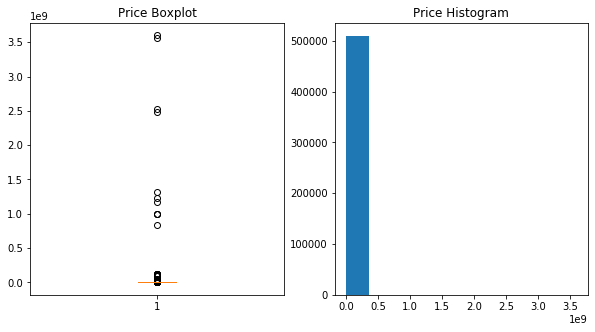

In [105]:
outlier_visual(cars['price'], 'Price')

### Outliers for ```year``` 

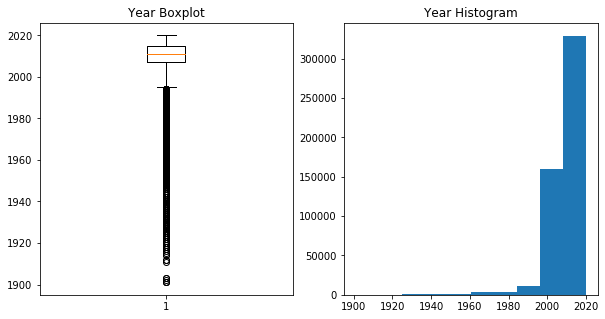

In [106]:
outlier_visual(cars['year'], 'Year')

### Outliers for ```odometer``` 

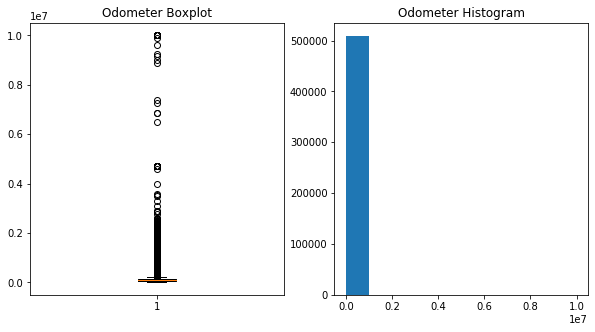

In [107]:
outlier_visual(cars['odometer'], 'Odometer')

### Outliers for ```lat``` 

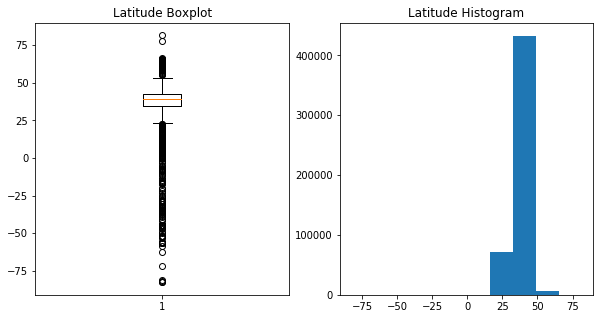

In [108]:
outlier_visual(cars['lat'], 'Latitude')

### Outliers for ```long``` 

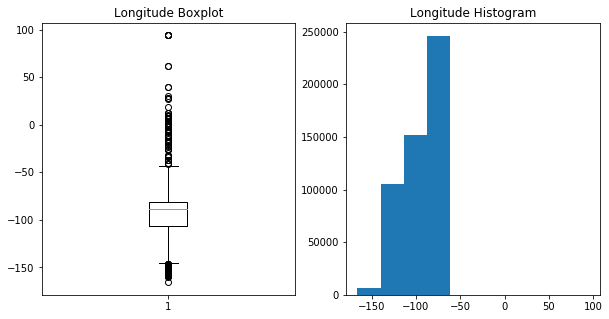

In [109]:
outlier_visual(cars['long'], 'Longitude')

### Outlier Winsorization

In [110]:
# Limit outliers through winsorization
price_winsor = winsorize(cars['price'], (0, 0.04))
year_winsor = winsorize(cars['year'], (0.04, 0))
odometer_winsor = winsorize(cars['odometer'], (0, 0.03))
lat_winsor = winsorize(cars['lat'], (0.01, 0.01))
long_winsor = winsorize(cars['long'], (0.02, 0.01))

### Winsorization for ```price``` 

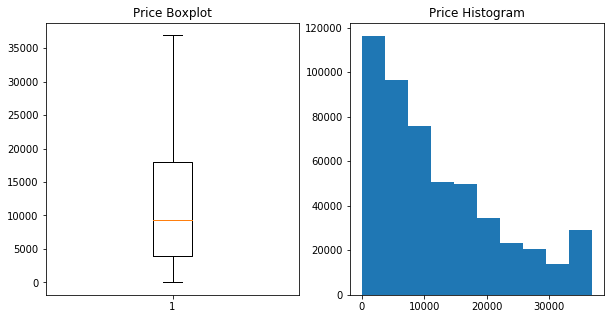

In [111]:
outlier_visual(price_winsor, 'Price')

### Winsorization for ```year``` 

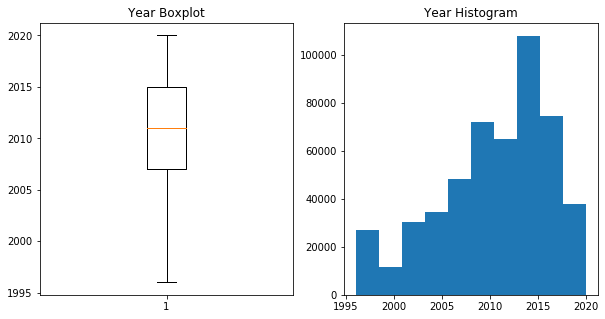

In [112]:
outlier_visual(year_winsor, 'Year')

### Winsorization for ```odometer``` 

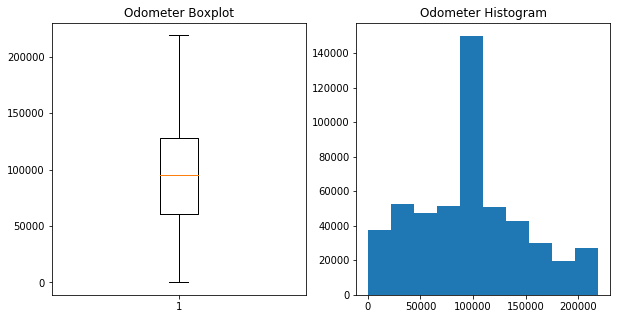

In [113]:
outlier_visual(odometer_winsor, 'Odometer')

### Winsorization for ```latitude``` 

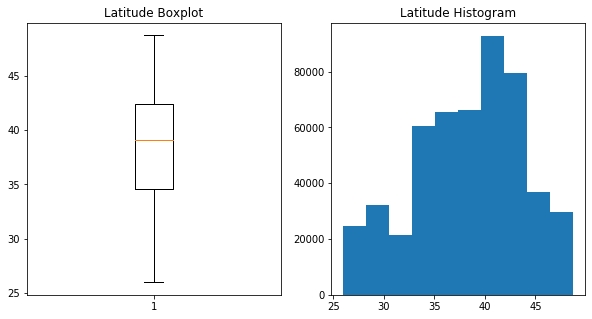

In [114]:
outlier_visual(lat_winsor, 'Latitude')

### Winsorization for ```longitude``` 

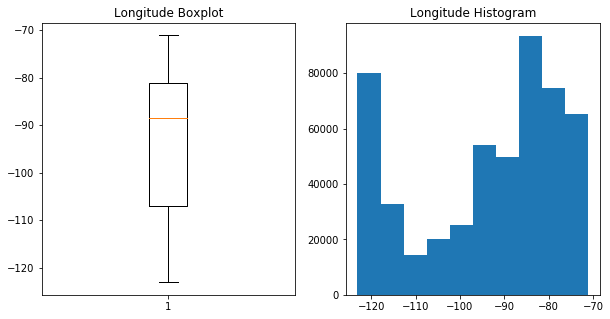

In [115]:
outlier_visual(long_winsor, 'Longitude')

In [116]:
# Add winsorized variables to dataset
cars['price_winsor'] = price_winsor
cars['year_winsor'] = year_winsor
cars['odometer_winsor'] = odometer_winsor
cars['lat_winsor'] = lat_winsor
cars['long_winsor'] = long_winsor

## Data Exploration and Feature Engineering 

#### Continuous Variables 

In [117]:
cars['price_winsor'].describe()

count    509515.000000
mean      12044.748659
std       10145.749874
min           0.000000
25%        3995.000000
50%        9388.000000
75%       17959.000000
max       36900.000000
Name: price_winsor, dtype: float64

In [118]:
cars['year_winsor'].describe()

count    509515.000000
mean       2010.334391
std           5.894802
min        1996.000000
25%        2007.000000
50%        2011.000000
75%        2015.000000
max        2020.000000
Name: year_winsor, dtype: float64

In [119]:
cars['odometer_winsor'].describe()

count    509515.000000
mean      97295.062495
std       52220.389770
min           0.000000
25%       60729.000000
50%       94892.000000
75%      127906.500000
max      219000.000000
Name: odometer_winsor, dtype: float64

In [120]:
cars['lat_winsor'].describe()

count    509515.000000
mean         38.393155
std           5.393560
min          25.950400
25%          34.620000
50%          39.113700
75%          42.428900
max          48.755700
Name: lat_winsor, dtype: float64

In [121]:
cars['long_winsor'].describe()

count    509515.000000
mean        -93.802820
std          16.573649
min        -123.128000
25%        -106.944000
50%         -88.445200
75%         -81.037100
max         -71.102600
Name: long_winsor, dtype: float64

In [122]:
cars[['price_winsor', 'year_winsor', 'odometer_winsor', 'lat_winsor', 'long_winsor']].corr()

# heatmap

# pairplot later on when doing bivariate analysis

,price_winsor,year_winsor,odometer_winsor,lat_winsor,long_winsor
price_winsor,1.000000,0.432221,-0.360352,0.038511,-0.119000
year_winsor,0.432221,1.000000,-0.491530,-0.002832,-0.029633
odometer_winsor,-0.360352,-0.491530,1.000000,0.017094,0.057163
lat_winsor,0.038511,-0.002832,0.017094,1.000000,-0.125354
long_winsor,-0.119000,-0.029633,0.057163,-0.125354,1.000000


#### Categorical Variables 

In [123]:
def categorical_visual(column):
    plt.figure(figsize=(20, 10))
    plt.barh(cars.groupby(column)[column].count().index,
             cars.groupby(column)[column].count())
    plt.title('Horizontal bar chart for {}'.format(column))
    plt.show()

In [124]:
categorical = []

for column in cars.columns:
    
    if cars[column].dtype == 'object' and column != 'description':
        categorical.append(column)
        
categorical

['region',
 'manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state']

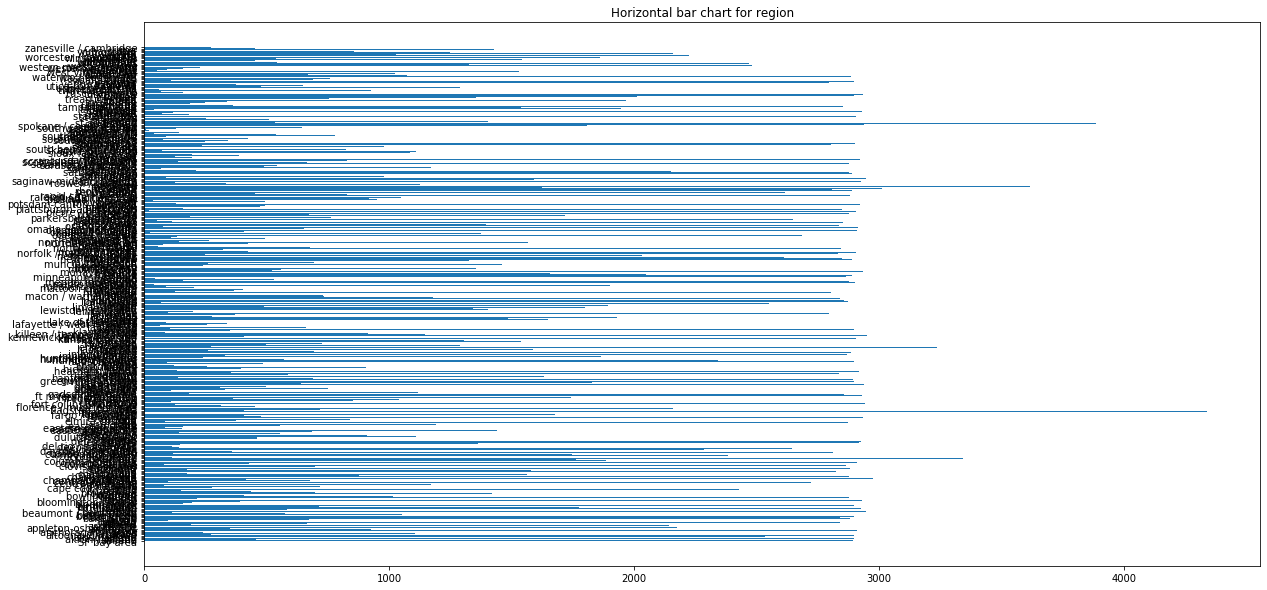

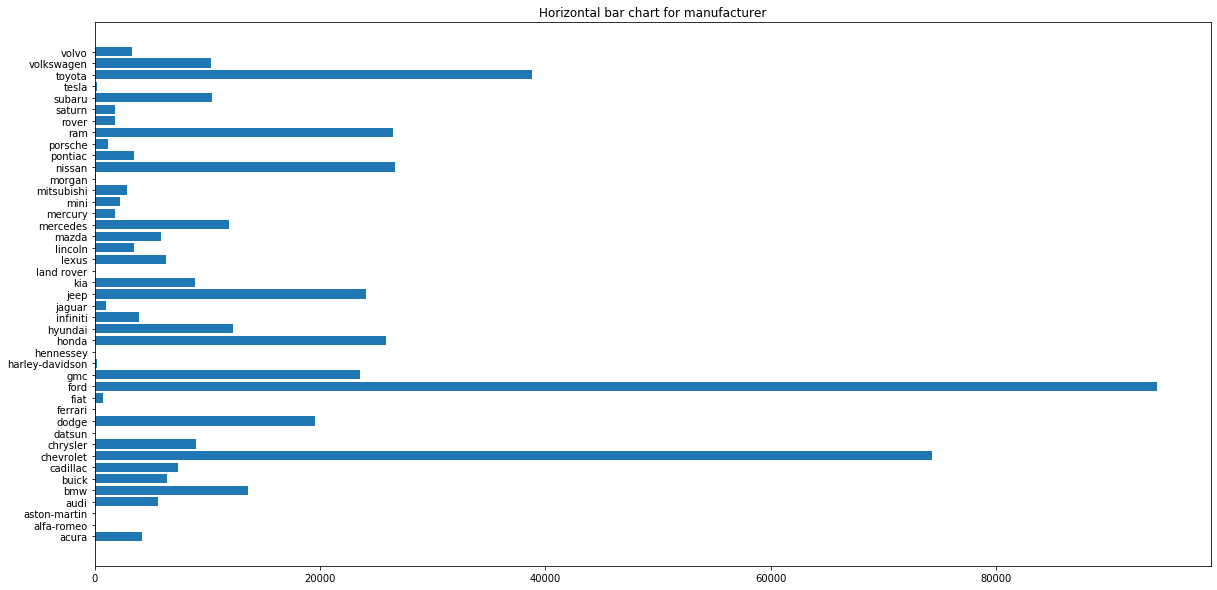

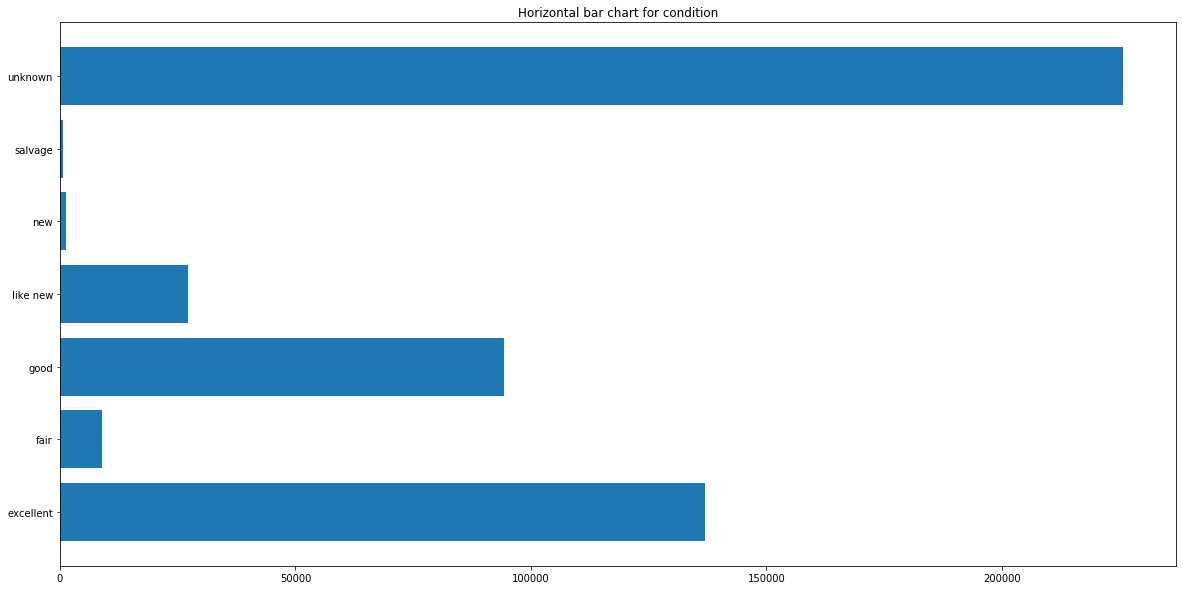

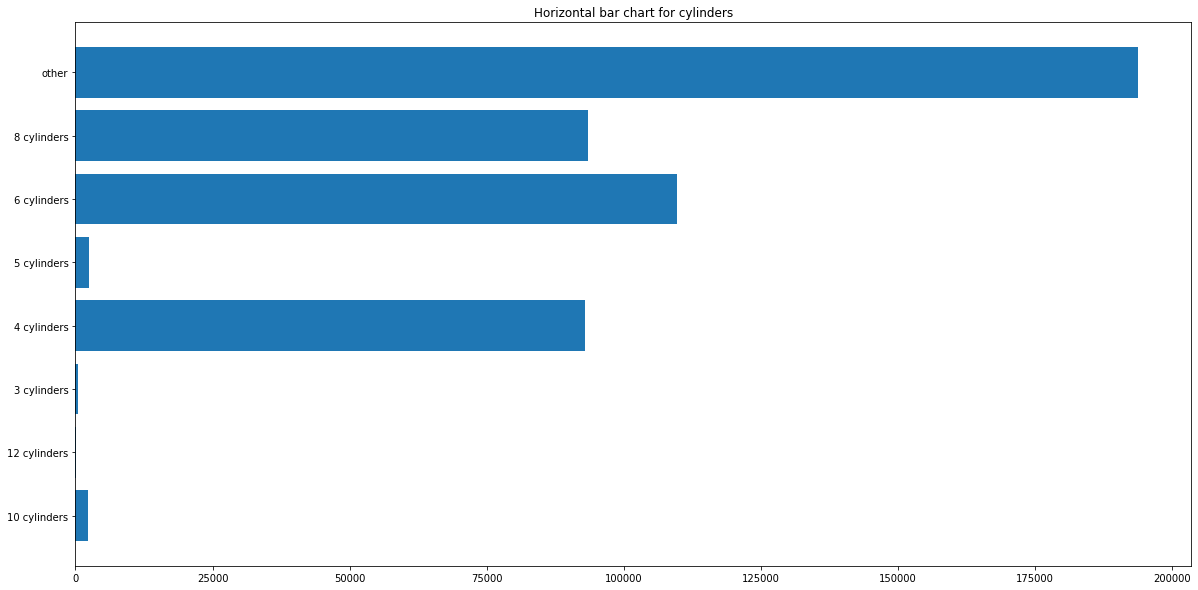

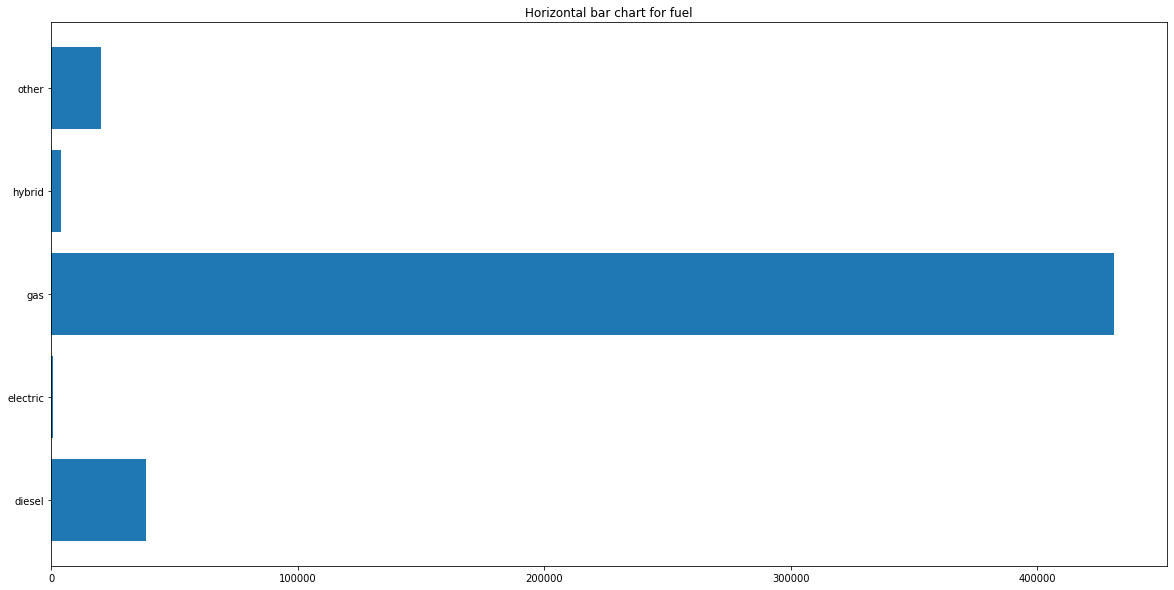

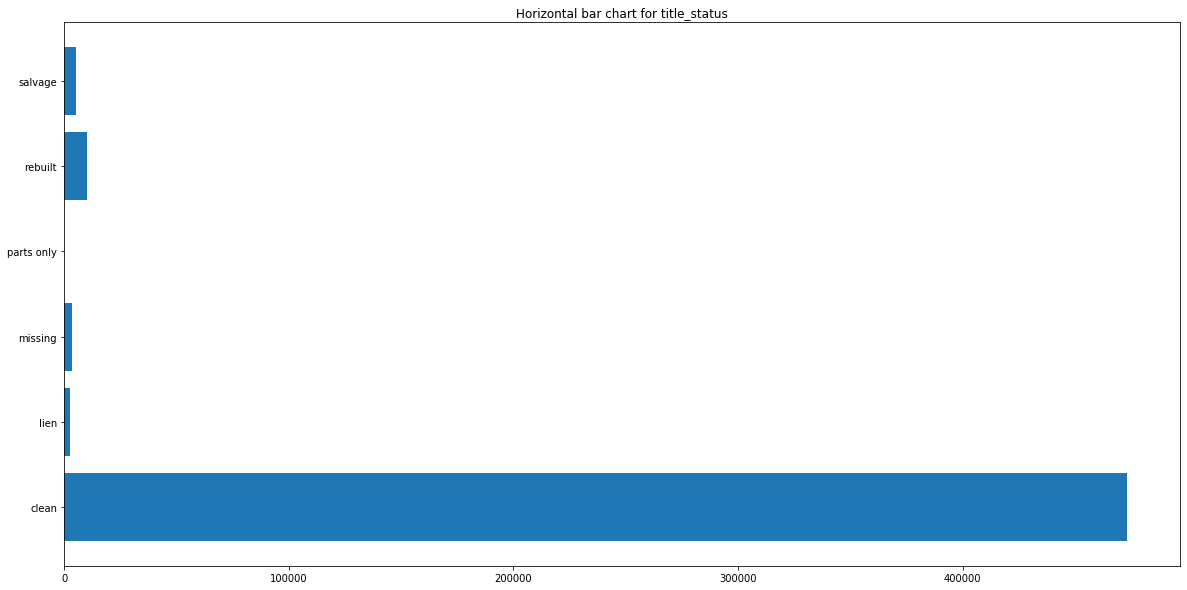

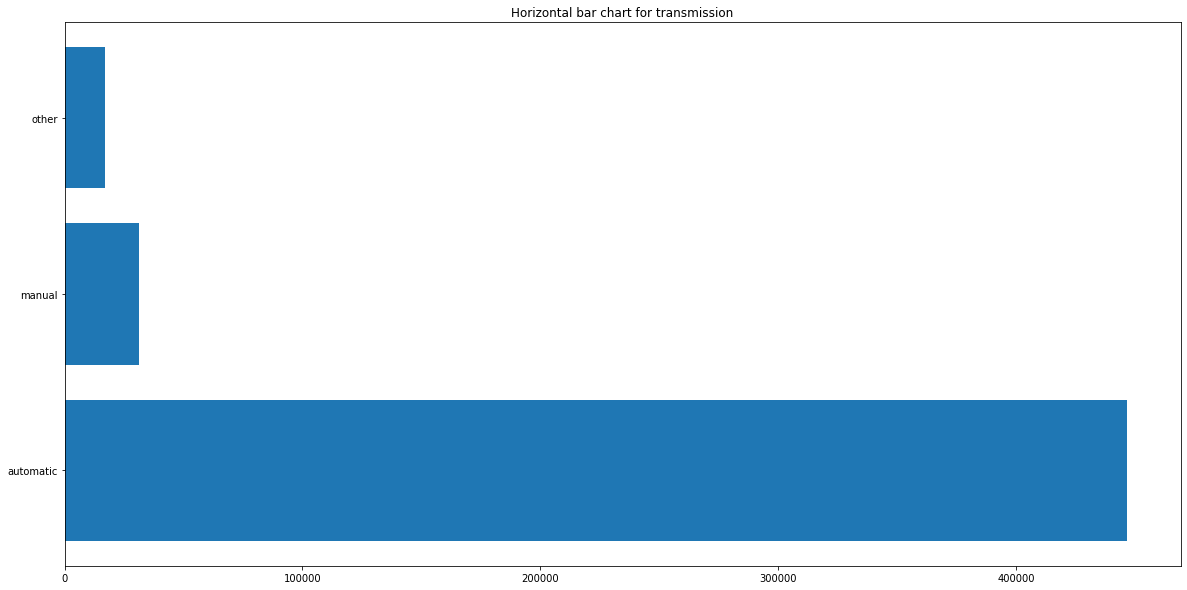

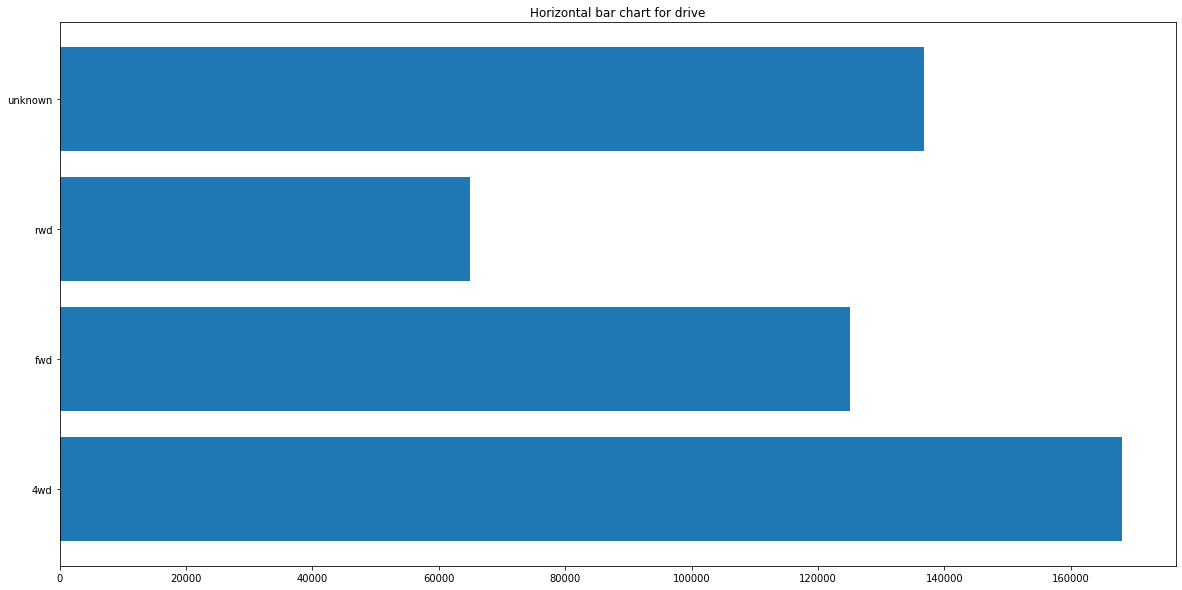

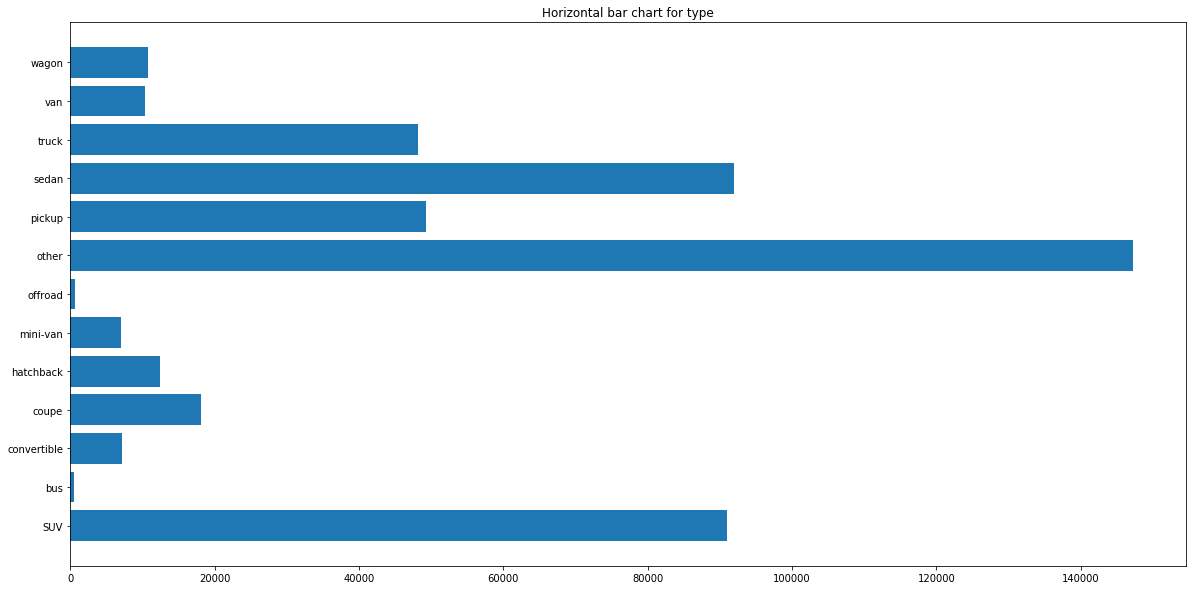

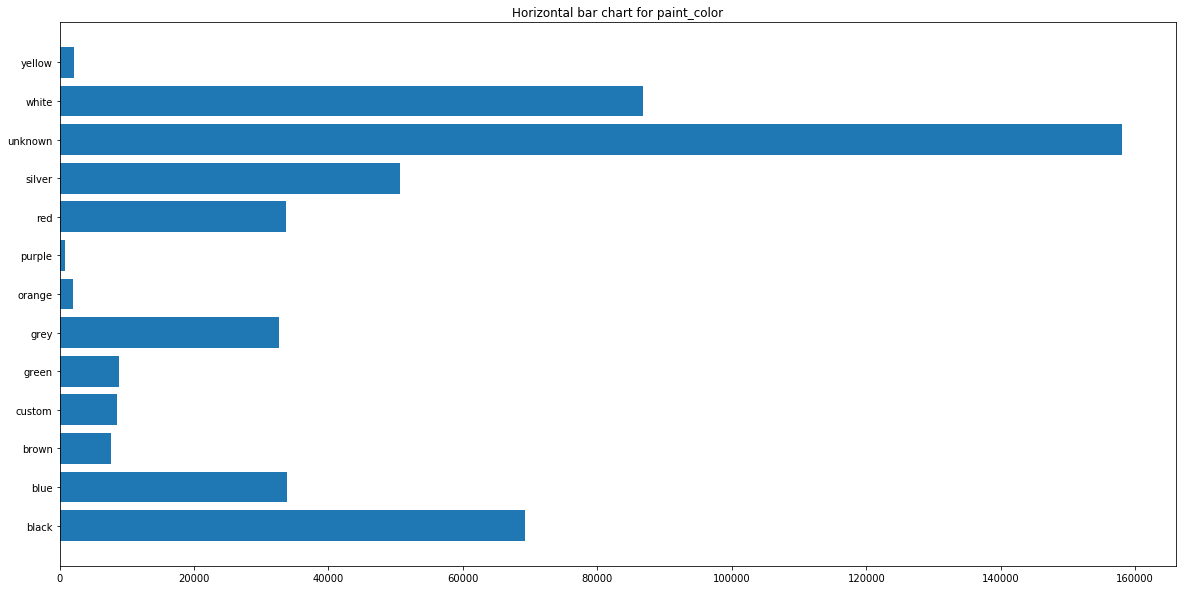

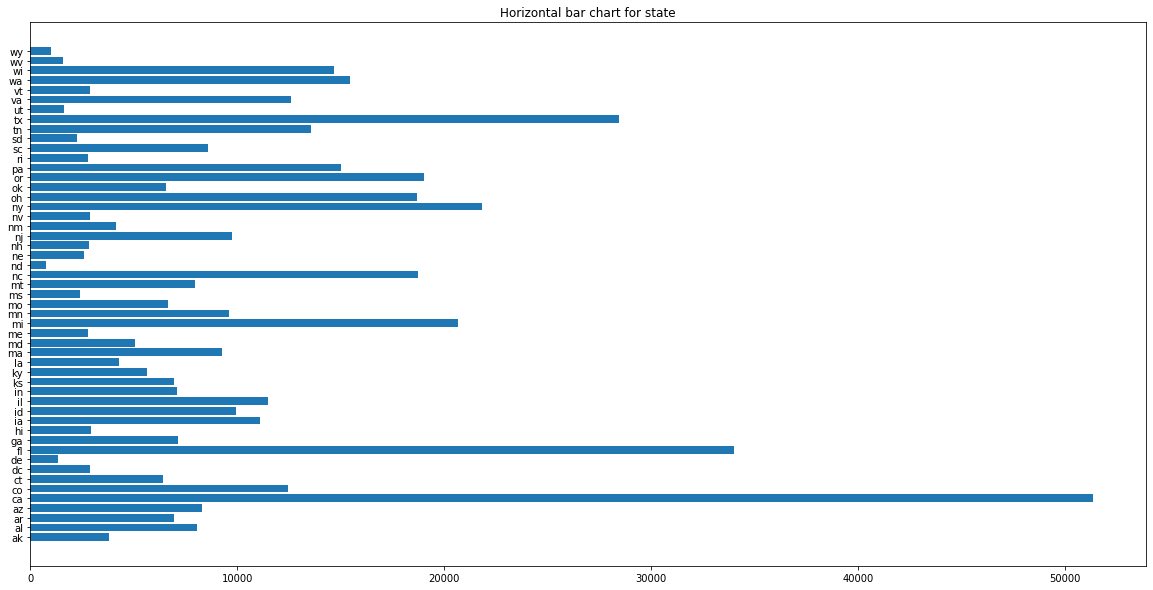

In [184]:
for category in categorical:
    categorical_visual(category)

remove:
region
state
condition
cylinders
drive
paint color

keep:
manufacturer
fuel
title status
transmission
type

GridSearchcv and randomsearch (faster) to tune parameters for models

## Model Creation and Performance Evaluation 